# Training the model

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
        'population', 'households', 'median_income']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

BaselineModel = RandomForestRegressor(n_estimators=100,min_samples_split=50,random_state=1)
BaselineModel.fit(X_train,y_train)
y_pred = BaselineModel.predict(X_test)
y_pred

array([242232.41121039, 274443.83252098, 178452.36827866, ...,
       137005.7158252 , 111702.97298471, 202946.73638533])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7859863346034253

In [ ]:
df = pd.read_csv('/content/housing.csv')
df['total_bedrooms'].dropna()
df[['total_bedrooms']] = df[['total_bedrooms']].fillna(df['total_bedrooms'].mean())
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

#  Preprocessing / Scaling

In [ ]:
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler


scalers = {
    'Normalizer' : Normalizer(),
    'MinMaxScaler' : MinMaxScaler(),
    'StandardScaler' : StandardScaler()
}

scaled_X_train = {}
scaled_X_test = {}

for name,scaler in scalers.items():
  scaled_X_train[name] = scaler.fit_transform(X_train)
  scaled_X_test[name] = scaler.transform(X_test)



resultr2 = {}
for name,scalers in scaled_X_train.items():
  BaselineModel.fit(scalers,y_train)
  # print(f'{name} got fitted \n')
  y_pred = BaselineModel.predict(scaled_X_test[name])
  r2 = r2_score(y_test,y_pred)
  resultr2[name] = r2
  print(f'r2 score of {name} is {r2}')





r2 score of Normalizer is 0.6248133383134002
r2 score of MinMaxScaler is 0.7861181381563915
r2 score of StandardScaler is 0.7861216629574163


# Dimensionality Reduction (PCA)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# ---------------------------optional code for testing used form categorical section

# Nominal Data: Use One-Hot Encoding or Frequency Encoding.
# Ordinal Data: Use Label Encoding or Ordinal Encoding.
# High-Cardinality Features: Use Target Encoding or Frequency Encoding.

# categoricaldf = df['ocean_proximity']
# from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()

# ecoded_label = lb.fit_transform(categoricaldf)
# ecoded_label
# df['ocean_proximity'] = ecoded_label
# ------------------------------df


# Define features (excluding target)
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
        'population', 'households', 'median_income']]
y = df['median_house_value']

# Standardize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)




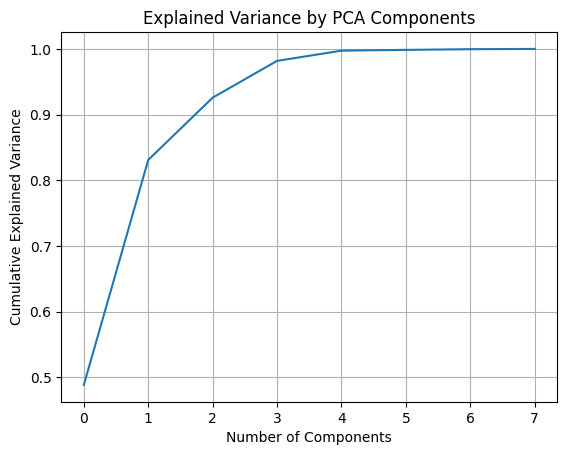

In [ ]:
# Apply PCA and keep all components to check explained variance
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Check explained variance ratio
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()


In [ ]:
pca = PCA(n_components=4)  # Adjust this based on the plot
X_reduced = pca.fit_transform(X_scaled)

In [ ]:
# # Split the PCA-transformed data
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Split the PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, gamma=0.1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Linear Regression": LinearRegression()
}

# Train and evaluate models
def r2scorefinder(models,X_train,y_train,X_test,y_test):
  results = {}
  for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      r2 = r2_score(y_test, y_pred)
      results[name] = r2
      print(f'{name} R2 Score after PCA: {r2:.4f}')

  # Sort results by R2 score
  sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

  print("\n🔹 Best Model Performance:")
  for model, r2 in sorted_results.items():
      print(f"{model}: R2 Score = {r2:.4f}")
r2scorefinder(models,X_train,y_train,X_test,y_test)



# after i did categorical ecodeing and the got 8 features and seleccted 5 Components and result is :
# 🔹 Best Model Performance:
# XGBoost: R2 Score = 0.7354
# Random Forest: R2 Score = 0.7301
# Gradient Boosting: R2 Score = 0.6849
# Linear Regression: R2 Score = 0.5378
# SVR: R2 Score = -0.0062

Random Forest R2 Score after PCA: 0.6254
SVR R2 Score after PCA: -0.0093
Gradient Boosting R2 Score after PCA: 0.6165
XGBoost R2 Score after PCA: 0.6524
Linear Regression R2 Score after PCA: 0.5312

🔹 Best Model Performance:
XGBoost: R2 Score = 0.6524
Random Forest: R2 Score = 0.6254
Gradient Boosting: R2 Score = 0.6165
Linear Regression: R2 Score = 0.5312
SVR: R2 Score = -0.0093


# Categorical Encoding (Dummy / One-Hot)




In [ ]:
# Nominal Data: Use One-Hot Encoding or Frequency Encoding.
# Ordinal Data: Use Label Encoding or Ordinal Encoding.
# High-Cardinality Features: Use Target Encoding or Frequency Encoding.


categoricaldf = df['ocean_proximity']
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

ecoded_label = lb.fit_transform(categoricaldf)
ecoded_label
df['ocean_proximity'] = ecoded_label
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [ ]:
X_cat_add = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
        'population', 'households', 'median_income','ocean_proximity']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X_cat_add, y,test_size=0.25)

r2scorefinder(models,X_train,y_train,X_test,y_test)

Random Forest R2 Score after PCA: 0.8228
SVR R2 Score after PCA: -0.0536
Gradient Boosting R2 Score after PCA: 0.7782
XGBoost R2 Score after PCA: 0.8298
Linear Regression R2 Score after PCA: 0.6541

🔹 Best Model Performance:
XGBoost: R2 Score = 0.8298
Random Forest: R2 Score = 0.8228
Gradient Boosting: R2 Score = 0.7782
Linear Regression: R2 Score = 0.6541
SVR: R2 Score = -0.0536


#  Binning (Grouping / Aggregating)



# Clustering (K-Means)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px


# Sample data (Customer Spend & Frequency)
X = df[['longitude', 'latitude']].to_numpy()

kmean_cluster = KMeans(n_clusters=2).fit(X)


df['cluster'] = kmean_cluster.labels_

# Plot results using Plotly
fig = px.scatter(df, x='longitude', y='latitude', color=df['cluster'].astype(str),
                 title="KMeans Clustering on Housing Data")
fig.show()

In [ ]:
px.scatter()

#  Feature Selection

In [ ]:
# basically combining scaleddf,clusterdf,pcadf etc.

# Practice of EDA and feature engineering



In [ ]:
import pandas as pd
df = pd.read_csv('/content/ZomatoDataser/zomato.csv',encoding='latin')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

(9551, 21)

In [ ]:
df.columns.nunique()

# ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
#        'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
#        'Average Cost for two', 'Currency', 'Has Table booking',
#        'Has Online delivery', 'Is delivering now', 'Switch to order menu',
#        'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
#        'Votes']

21

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


**Thing to do in data before processing**
1. Missing value
2. Explore Numerical Variable
3. Explore Categorical Variable
4. Finding relationship between features

In [ ]:
df.isnull().sum()
df['Cuisines'].isnull().value_counts()

,count
Cuisines,
False,9542
True,9


In [ ]:
df_country = pd.read_excel("/content/ZomatoDataser/Country-Code.xlsx")
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [ ]:
df_final = pd.merge(df,df_country,on='Country Code')
df_final

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
